# **YULU - Motor Vehicles**

*  Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

*   Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

**The company wants to know:**


*   Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
*   How well those variables describe the electric cycle demands

**Variables considered in tracking Business:**
*   datetime: datetime
*   season: season (1: spring, 2: summer, 3: fall, 4: winter)
*   holiday: whether day is a holiday or not
*   workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
*   weather:
    1.   Clear, Few clouds, partly cloudy, partly cloudy
    2.   Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3.   Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4.   Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
*   temp: temperature in Celsius
*   atemp: feeling temperature in Celsius
*   humidity: humidity
*   windspeed: wind speed
*   casual: count of casual users
*   registered: count of registered users
*   count: count of total rental bikes including both casual and registered

# **Explorative Data Analysis(EDA)**



*   Importing necessary packages for EDA



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



*   Importing/Reading the dataset for EDA



In [ ]:
Y=pd.read_csv("Yulu.csv")

In [ ]:
Y.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1




*   Shape of the dataset


In [ ]:
Y.shape

(10886, 12)



The dataset contains 10886 rows ans 12 columns.





*   Characteristics of the dataset



In [ ]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB




The dataset contains 12 features with no Null values or missing values.




*   Statistical Summary of all the features in dataset



In [ ]:
Y.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000




*   Dropping features not useful for EDA



In [ ]:
Y.drop(columns=['datetime','registered','casual'],inplace=True)

**Correlation between Variables**

In [ ]:
Y.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,1.000000


<Axes: >

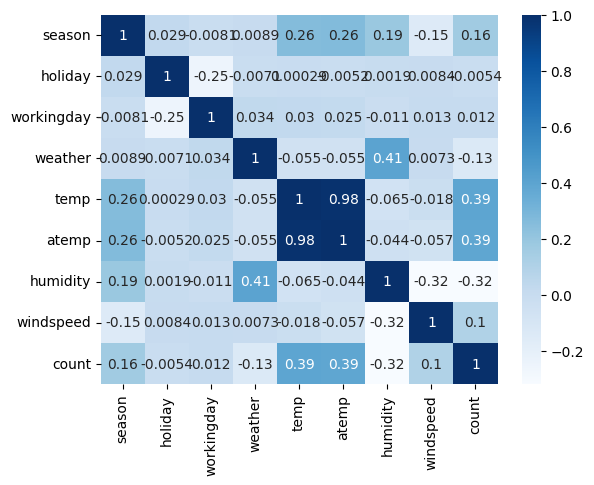

In [ ]:
sns.heatmap(Y.corr(),cmap ='Blues',annot=True)



*   temp and atemp are highly correlated features. So, dropping the correlated features.



In [ ]:
Y.drop(columns=['temp','atemp'],inplace=True)

In [ ]:
Y.head()

,season,holiday,workingday,weather,humidity,windspeed,count
0,1,0,0,1,81,0.0,16
1,1,0,0,1,80,0.0,40
2,1,0,0,1,80,0.0,32
3,1,0,0,1,75,0.0,13
4,1,0,0,1,75,0.0,1


# **Outlier's Detection**



*   Continous Variables



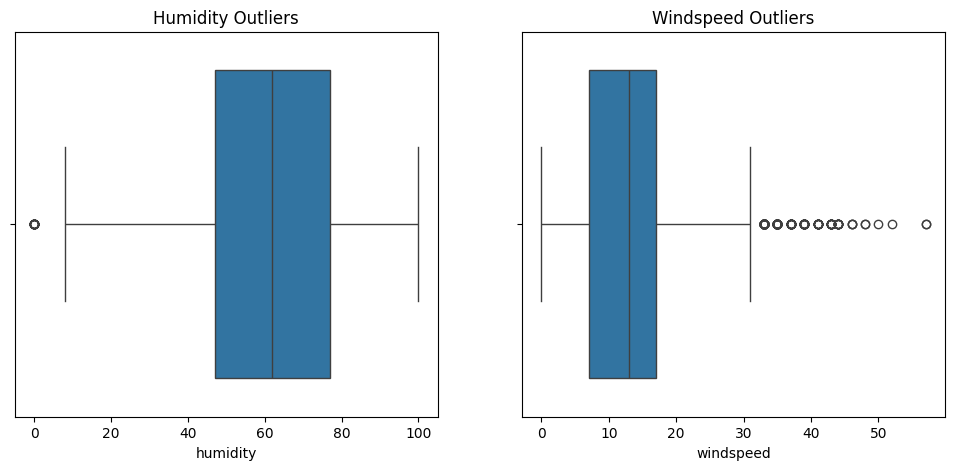

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='humidity', data=Y)
plt.title('Humidity Outliers')
plt.subplot(1,2,2)
sns.boxplot(x='windspeed', data=Y)
plt.title('Windspeed Outliers')
plt.show()



*   Humidity



In [ ]:
# finding the 1st Quartile
Q1 = np.quantile(Y['humidity'], 0.25)

# finding the 3rd Quartile
Q3 = np.quantile(Y['humidity'], 0.75)

# finding the Inter-Quartile-Range(IQR) region
IQR = Q3-Q1

# finding upper and lower whiskers
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
print(IQR, lower_bound, upper_bound)

30.0 2.0 122.0


In [ ]:
outliers = Y['humidity'][(Y['humidity'] <= lower_bound) | (Y['humidity'] >= upper_bound)]
print(outliers)

1091    0
1092    0
1093    0
1094    0
1095    0
1096    0
1097    0
1098    0
1099    0
1100    0
1101    0
1102    0
1103    0
1104    0
1105    0
1106    0
1107    0
1108    0
1109    0
1110    0
1111    0
1112    0
Name: humidity, dtype: int64


Replacing outliers with the median value.

In [ ]:
Y.loc[(Y['humidity'] <= lower_bound) | (Y['humidity'] >= upper_bound), 'humidity'] = Y['humidity'].median()



*   Windspeed



In [ ]:
# finding the 1st Quartile
Q1 = np.quantile(Y['windspeed'], 0.25)

# finding the 3rd Quartile
Q3 = np.quantile(Y['windspeed'], 0.75)

# finding the Inter-Quartile-Range(IQR) region
IQR = Q3-Q1

# finding upper and lower whiskers
upper_bound = Q3+(1.5*IQR)
lower_bound = min(Y['windspeed'])
print(IQR, lower_bound, upper_bound)

9.996400000000001 0.0 31.992500000000003


In [ ]:
outliers = Y['windspeed'][(Y['windspeed'] <= lower_bound) | (Y['windspeed'] >= upper_bound)]
print(outliers)

0         0.0000
1         0.0000
2         0.0000
3         0.0000
4         0.0000
          ...   
10829     0.0000
10846     0.0000
10853    32.9975
10860     0.0000
10862     0.0000
Name: windspeed, Length: 1540, dtype: float64


Replacing outliers with the median value.

In [ ]:
Y.loc[(Y['windspeed'] <= lower_bound) | (Y['windspeed'] >= upper_bound), 'windspeed'] = Y['windspeed'].median()

# **Univariate Analysis**



*   Continous Variables



Humidity

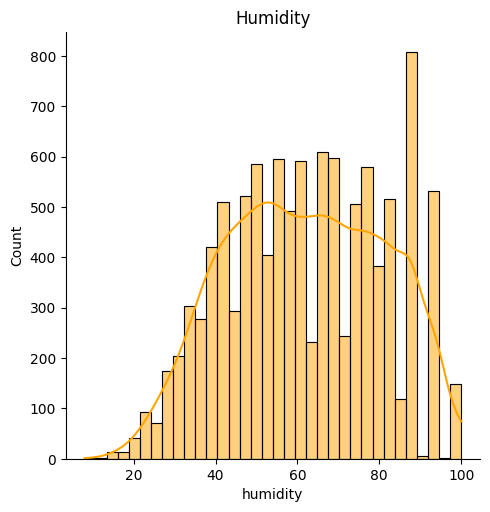

In [ ]:
sns.displot(Y['humidity'],color='orange',kde=True)
plt.xlabel("humidity")
plt.title("Humidity")
plt.show()

'Humidity' values doesn't following Normal distribution.

Windspeed

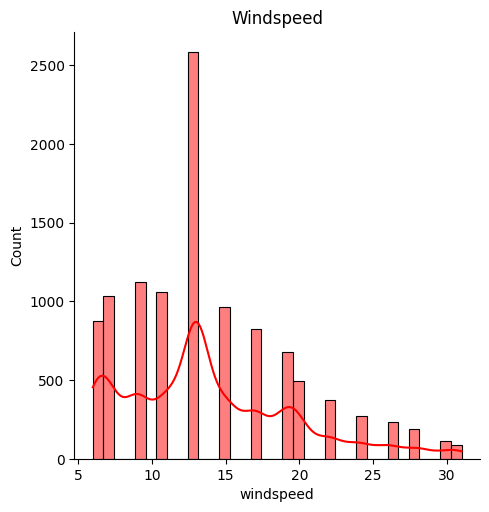

In [ ]:
sns.displot(Y['windspeed'],color='red',kde=True)
plt.xlabel("windspeed")
plt.title("Windspeed")
plt.show()

'Windspeed' values doesn't following Normal distribution.



*   Categorical Variables



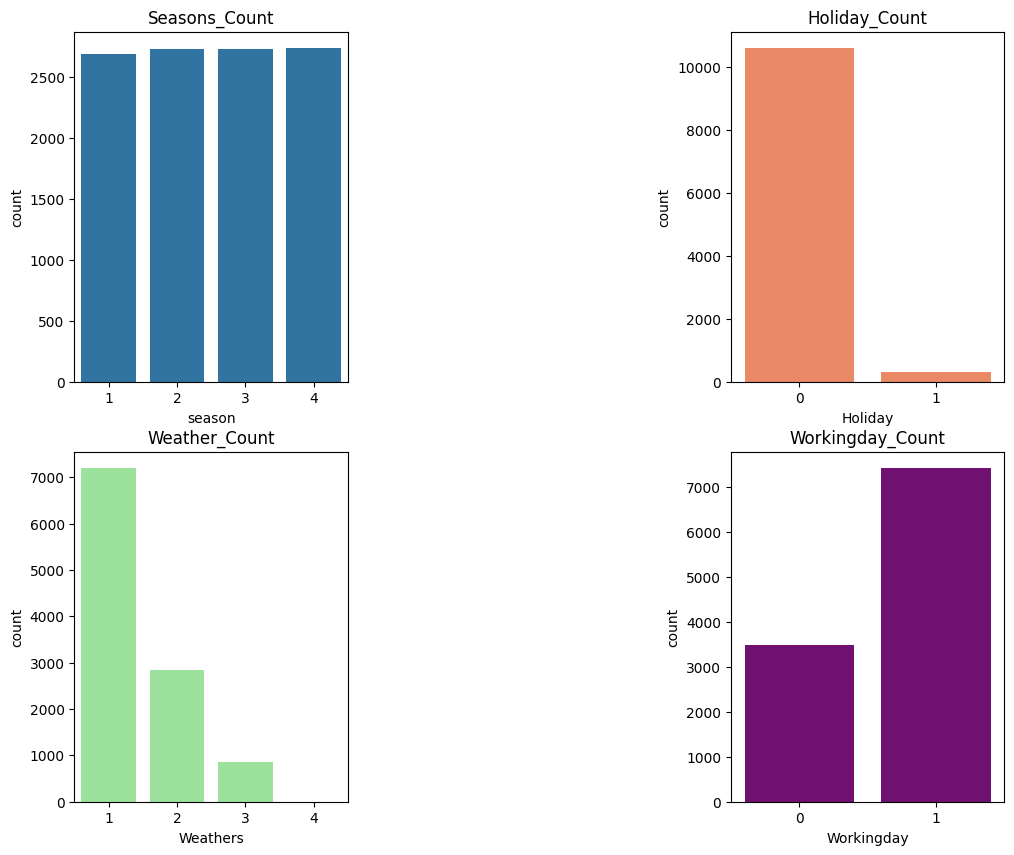

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(231)
sns.countplot(Y,x='season')
plt.xlabel("season")
plt.title("Seasons_Count")
plt.subplot(233)
sns.countplot(Y,x='holiday',color="coral")
plt.xlabel("Holiday")
plt.title("Holiday_Count")
plt.subplot(234)
sns.countplot(Y,x='weather',color='lightgreen')
plt.xlabel("Weathers")
plt.title("Weather_Count")
plt.subplot(236)
sns.countplot(Y,x='workingday',color='purple')
plt.xlabel("Workingday")
plt.title("Workingday_Count")
plt.show()

# **Bivariate Analysis**



*   Workday VS Count



In [ ]:
Y['workingday'].value_counts()

,count
workingday,
1,7412
0,3474


There are 7412 weekdays and 3474 weekends.

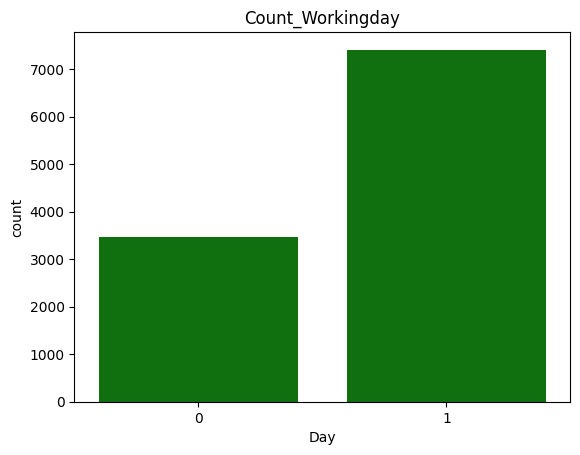

In [ ]:
sns.countplot(Y,x='workingday',color='green')
plt.xlabel("Day")
plt.title("Count_Workingday")
plt.show()

In [ ]:
print(Y[Y['workingday']== 0]['count'].sum())
print(Y[Y['workingday']== 1]['count'].sum())

654872
1430604




*   654872 bike rides were rented on weekend days.
*   1430604 bike rides were rented on weekdays.



*   Season VS Count




In [ ]:
Y['season'].value_counts()

,count
season,
4,2734
2,2733
3,2733
1,2686


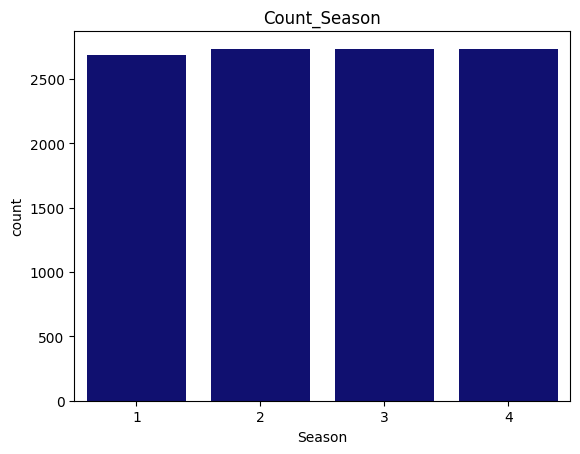

In [ ]:
sns.countplot(Y,x='season',color='navy')
plt.xlabel("Season")
plt.title("Count_Season")
plt.show()

In [ ]:
print(Y[Y['season']== 1]['count'].sum())
print(Y[Y['season']== 2]['count'].sum())
print(Y[Y['season']== 3]['count'].sum())
print(Y[Y['season']== 4]['count'].sum())

312498
588282
640662
544034




*   In 'Spring' season 312498 bike rides were rented.
*   In 'Summer' season 588282 bike rides were rented.
*   In 'Fall' season 640662 bike rides were rented.
*   In 'Winter' season 544034 bike rides were rented.





*   Weather VS Count



In [ ]:
Y['weather'].value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


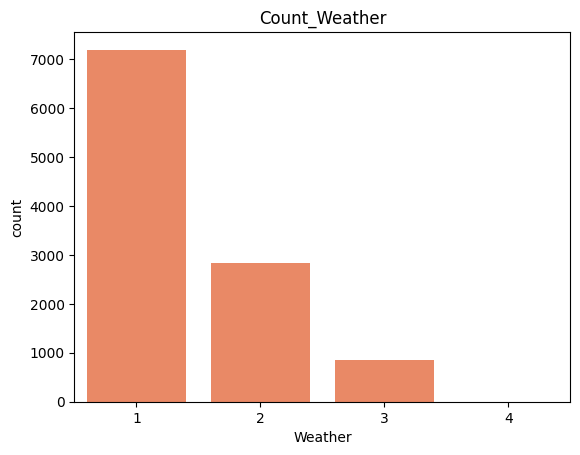

In [ ]:
sns.countplot(Y,x='weather',color='coral')
plt.xlabel("Weather")
plt.title("Count_Weather")
plt.show()

In [ ]:
print(Y[Y['weather']== 1]['count'].sum())
print(Y[Y['weather']== 2]['count'].sum())
print(Y[Y['weather']== 3]['count'].sum())
print(Y[Y['weather']== 4]['count'].sum())

1476063
507160
102089
164


*   In 'Clear, Few clouds, partly cloudy, partly cloudy' weather 1476063 bike rides were rented.
*   In 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist' weather 507160 bike rides were rented.
*   In 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds' weather 102089 bike rides were rented.
*   In 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog' weather 164 bike rides were rented.

# **Hypothesis - Testing**



# **Checking,If Working Day has an effect on the number of electric cycles rented.**








*   H0 - NULL Hypothesis
*   Ha - Alternate Hypothesis






*   H0 - There is no difference b/w the number of bike rented on weekends and weekdays.
*   Ha - There is difference b/w the number of bike rented on weekends and weekdays.



*   Significance level(alpha) = 5% (or) 0.05



*   2-Sample T-test is used to test 2 samples.
*   1st sample - Number of bikes rented on weekdays.
*   2nd sample - Number of bikes rented on weekends

In [ ]:
weekdays = Y.loc[Y['workingday'] == 1]['count']
weekends = Y.loc[Y['workingday'] == 0]['count']

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
t_stat, p_value = ttest_ind(weekends,weekdays,alternative='two-sided')
print("t_stat :",t_stat)
print("p_value :",p_value)

t_stat : -1.2096277376026694
p_value : 0.22644804226361348


In [ ]:
if p_value < 0.05:
  print("Reject the Null Hypothesis")
else:
  print("Failed to reject Null Hypothesis")

Failed to reject Null Hypothesis


Therefore, Number of bike rented on weekends is same as number of bikes rented on weekdays.



# **Checking,If Number of cycles rented is similar or different in different weather's.**


*   ANOVA - Oneway test is used to test 4 samples.
*   1st sample - Number of bikes rented on weather 1.
*   2nd sample - Number of bikes rented on weather 2.
*   3rd sample - Number of bikes rented on weather 3.
*   4th sample - Number of bikes rented on weather 4.

In [ ]:
w1 = Y.loc[Y['weather'] == 1]['count']
w2 = Y.loc[Y['weather'] == 2]['count']
w3 = Y.loc[Y['weather'] == 3]['count']
w4 = Y.loc[Y['weather'] == 4]['count']



*   Checking whether the number of bikes rented for different weather's follow Annova assumptions

1.Data should be gaussian - Histogram,Q-Q plot

2.Equal variance in different weathers - levene test

**Histogram**

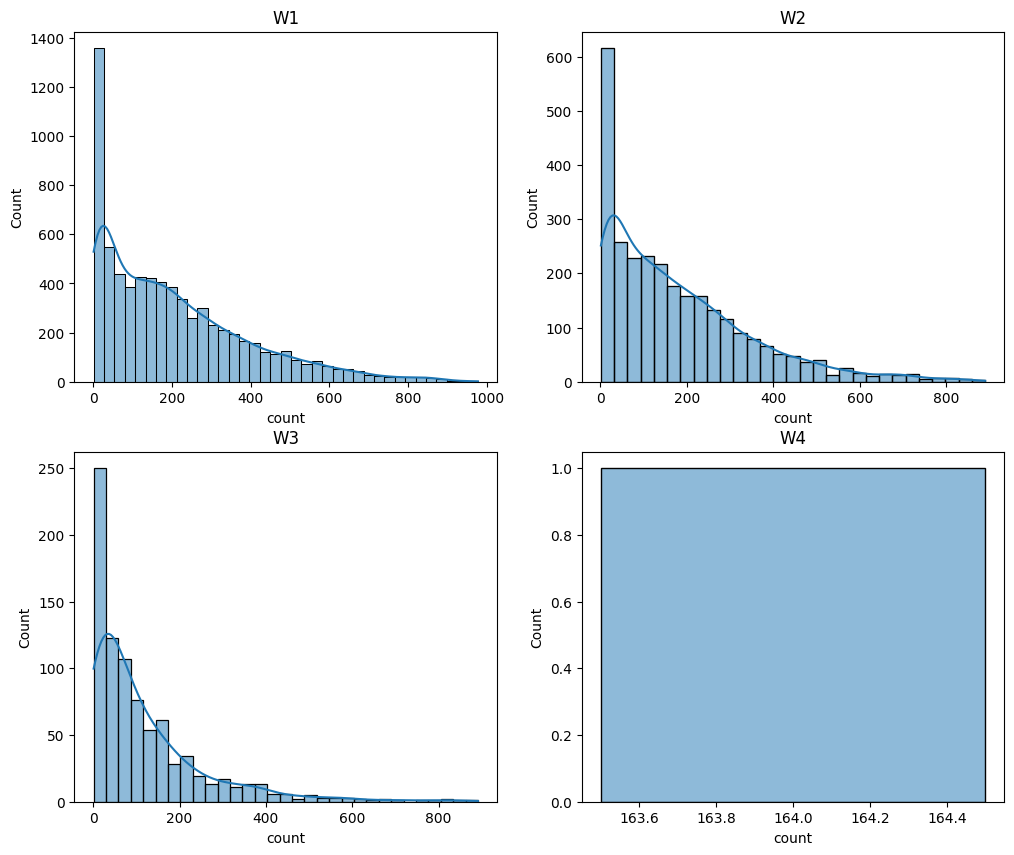

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.histplot(w1,kde=True)
plt.title("W1")
plt.subplot(222)
sns.histplot(w2,kde=True)
plt.title("W2")
plt.subplot(223)
sns.histplot(w3,kde=True)
plt.title("W3")
plt.subplot(224)
sns.histplot(w4,kde=True)
plt.title("W4")
plt.show()

**QQ PLOT**

In [ ]:
from statsmodels.graphics.gofplots import qqplot

<Figure size 1200x800 with 0 Axes>

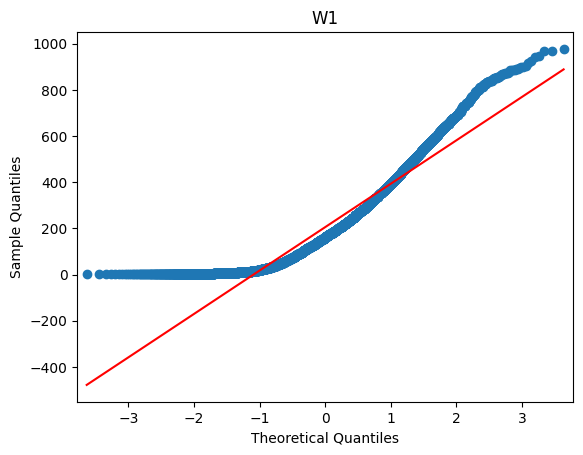

In [ ]:
plt.figure(figsize=(12,8))
qqplot(w1,line='s')
plt.title("W1")
plt.show()

<Figure size 1200x800 with 0 Axes>

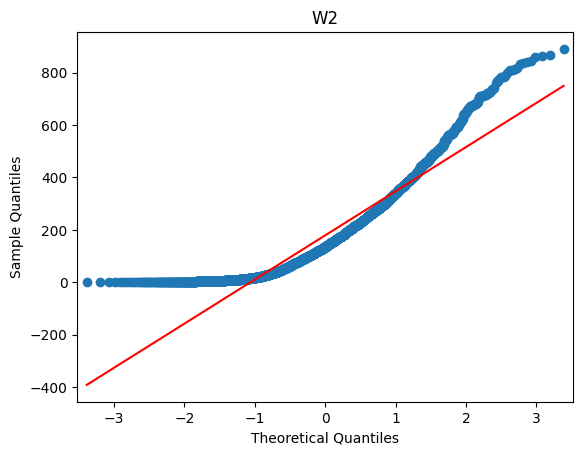

In [ ]:
plt.figure(figsize=(12,8))
qqplot(w2,line='s')
plt.title("W2")
plt.show()

<Figure size 1200x800 with 0 Axes>

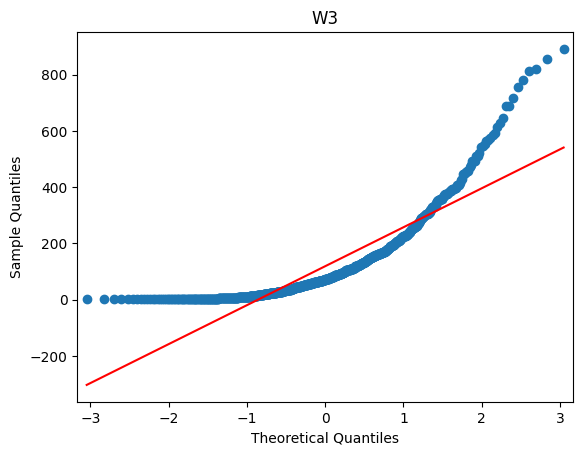

In [ ]:
plt.figure(figsize=(12,8))
qqplot(w3,line='s')
plt.title("W3")
plt.show()

<Figure size 1200x800 with 0 Axes>

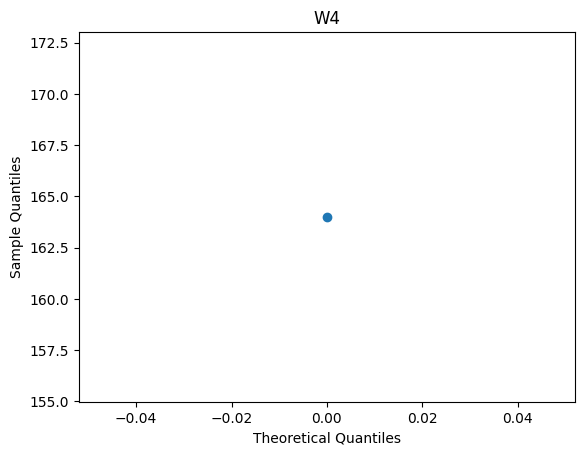

In [ ]:
plt.figure(figsize=(12,8))
qqplot(w4,line='s')
plt.title("W4")
plt.show()

**Checking Variance are same for the different weathers - levene Test(Variance Test)**



*   H0 - There is no difference in variance of number of bike's rented on different weathers.
*   Ha - There is difference in variance of number's of bike rented on different weathers.


*   Significance level(alpha) = 5% (or) 0.05





In [ ]:
from scipy.stats import levene

In [ ]:
s_stat, p_value_variance = levene(w1,w2,w3,w4)
print("s_stats :",s_stat)
print("p_value :",p_value_variance)

s_stats : 54.85106195954556
p_value : 3.504937946833238e-35


In [ ]:
if p_value < 0.05:
  print("Reject the Null Hypothesis")
else:
  print("Failed to reject Null Hypothesis")

Failed to reject Null Hypothesis


*   From Histogram and qq plot the data does not follow normal distribution.
*   Variance of number of bikes rented in different weathers are different.

*   **The above data doesnt follow the ANOVA Assumptions.**

**KRUSKAL Test**
*   H0 - NULL Hypothesis
*   Ha - Alternate Hypothesis
*   H0 - There is no difference in number of bike rented on different weathers.
*   Ha - There is difference in number of bike rented on different weathers.
*   Significance level(alpha) = 5% (or) 0.05

In [ ]:
from scipy.stats import kruskal

In [ ]:
f_stat, p_value = kruskal(w1,w2,w3,w4)
print("f_stat :",f_stat)
print("p_value :",p_value)

f_stat : 205.00216514479087
p_value : 3.501611300708679e-44


In [ ]:
if p_value < 0.05:
  print("Reject the Null Hypothesis")
else:
  print("Failed to reject Null Hypothesis")

Reject the Null Hypothesis




Therefore,There is a difference in number of bikes rented in different weathers.



# **Checking,If Number of cycles rented is similar or different in different season's.**


*   ANOVA - Oneway test is used to test 4 samples.
*   1st sample - Number of bikes rented in season 1.
*   2nd sample - Number of bikes rented in season 2.
*   3rd sample - Number of bikes rented in season 3.
*   4th sample - Number of bikes rented in season 4.

In [ ]:
s1 = Y.loc[Y['season'] == 1]['count']
s2 = Y.loc[Y['season'] == 2]['count']
s3 = Y.loc[Y['season'] == 3]['count']
s4 = Y.loc[Y['season'] == 4]['count']



*   Checking whether the number of bikes rented for different weather's follow Annova assumptions

1.Data should be gaussian - Histogram,Q-Q plot

2.Equal variance in different weathers - levene test

**Histogram**

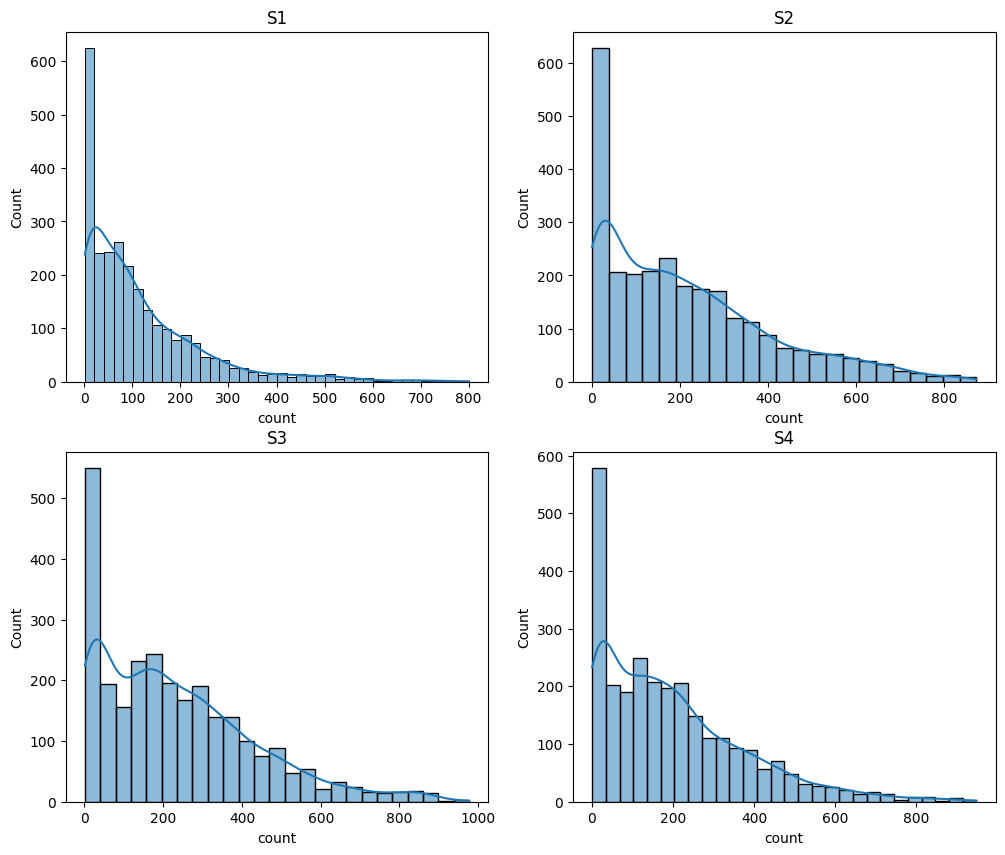

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.histplot(s1,kde=True)
plt.title("S1")
plt.subplot(222)
sns.histplot(s2,kde=True)
plt.title("S2")
plt.subplot(223)
sns.histplot(s3,kde=True)
plt.title("S3")
plt.subplot(224)
sns.histplot(s4,kde=True)
plt.title("S4")
plt.show()

**QQ PLOT**

<Figure size 1200x800 with 0 Axes>

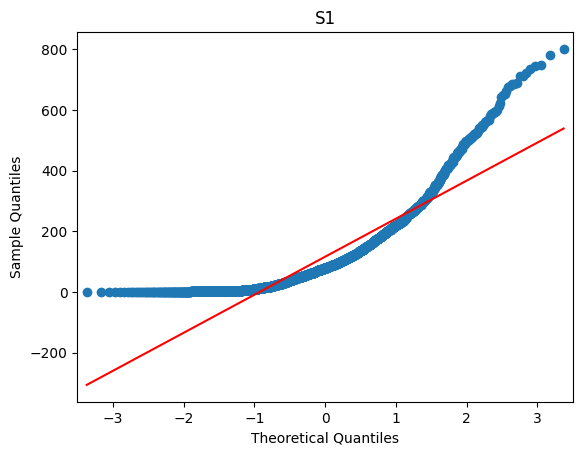

In [ ]:
plt.figure(figsize=(12,8))
qqplot(s1,line='s')
plt.title("S1")
plt.show()

<Figure size 1200x800 with 0 Axes>

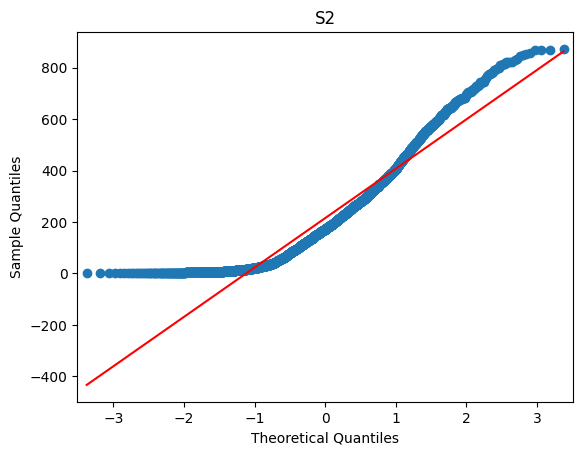

In [ ]:
plt.figure(figsize=(12,8))
qqplot(s2,line='s')
plt.title("S2")
plt.show()

<Figure size 1200x800 with 0 Axes>

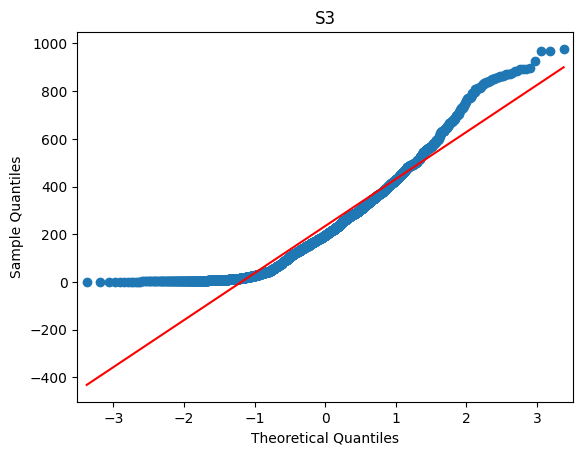

In [ ]:
plt.figure(figsize=(12,8))
qqplot(s3,line='s')
plt.title("S3")
plt.show()

<Figure size 1200x800 with 0 Axes>

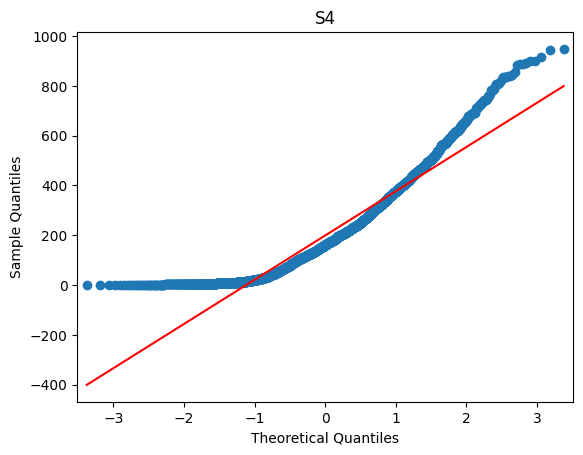

In [ ]:
plt.figure(figsize=(12,8))
qqplot(s4,line='s')
plt.title("S4")
plt.show()

**Checking Variance are same for the different seasons - levene Test(Variance Test)**



*   H0 - There is no difference in variance of number of bike's rented in different seasons.
*   Ha - There is difference in variance of number's of bike's rented in different seasons.


*   Significance level(alpha) = 5% (or) 0.05

In [ ]:
s_stat, p_value_variance = levene(s1,s2,s3,s4)
print("s_stats :",s_stat)
print("p_value :",p_value_variance)

s_stats : 187.7706624026276
p_value : 1.0147116860043298e-118


In [ ]:
if p_value < 0.05:
  print("Reject the Null Hypothesis")
else:
  print("Failed to reject Null Hypothesis")

Reject the Null Hypothesis


*   From Histogram and qq plot the data does not follow normal distribution.
*   Variance of number of bikes rented in different weathers are different.

*   **The above data doesnt follow the ANOVA Assumptions.**

**KRUSKAL Test**
*   H0 - NULL Hypothesis
*   Ha - Alternate Hypothesis
*   H0 - There is no difference in number of bike rented on different seasons.
*   Ha - There is difference in number of bike rented on different seasons.
*   Significance level(alpha) = 5% (or) 0.05

In [ ]:
f_stat, p_value = kruskal(s1,s2,s3,s4)
print("f_stat :",f_stat)
print("p_value :",p_value)

f_stat : 699.6668548181988
p_value : 2.479008372608633e-151


In [ ]:
if p_value < 0.05:
  print("Reject the Null Hypothesis")
else:
  print("Failed to reject Null Hypothesis")

Reject the Null Hypothesis


There is a difference in number of bikes rented in different seasons.

# **Checking,If Weather is dependent on the season.**



*   **Chi-Squared Test is used to test two categorical values.**
*   H0 - Weather is independent of season
*   Ha - Weather is dependent on the season
*   Significance level(alpha) = 5% (or) 0.05

In [ ]:
W_S=pd.crosstab(Y['weather'],Y['season'])

In [ ]:
W_S

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
stats, p_value , dof , expected = chi2_contingency(W_S)
print("stats :",stats)
print("p_value :",p_value)

stats : 49.15865559689363
p_value : 1.5499250736864862e-07


In [ ]:
if p_value < 0.05:
  print("Reject the Null Hypothesis")
else:
  print("Failed to reject Null Hypothesis")

Reject the Null Hypothesis


Therefore,Weather is dependent on season.

# **Recommendations**

*   Weekday have more number of bike rented than weekend.So, yulu bikes should priortise on availability of bikes on weekdays.
*   In 'Clear, Few clouds, partly cloudy, partly cloudy' weather there is a huge traffic in renting bikes.So, yulu bikes must priortise on availability of bikes on weekdays.